<a href="https://colab.research.google.com/github/gn0262487838/python_ipynb_ML_text/blob/master/regression_text_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [319]:
import pandas as pd
df = pd.DataFrame(diabetes["data"],columns=diabetes["feature_names"])
df["target"] = diabetes["target"]
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


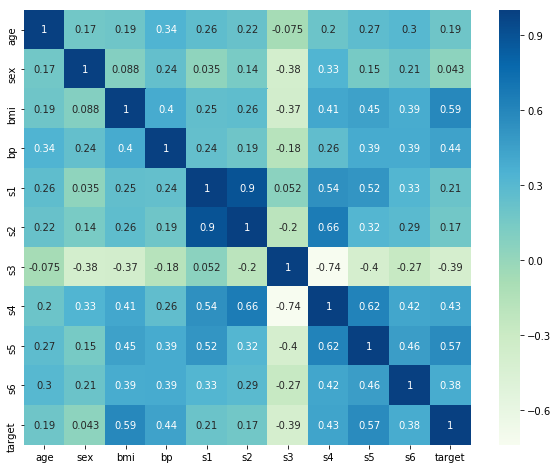

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.astype("float").corr(),cmap="GnBu",annot=True)


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_ans = train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.1)

# x_train, x_test, y_train, y_ans = train_test_split(diabetes["data"],diabetes["target"],test_size=0.1) 
# 請問上述這組資料如果把它來拿訓練呢? 資料一定要經過pandas???

In [322]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

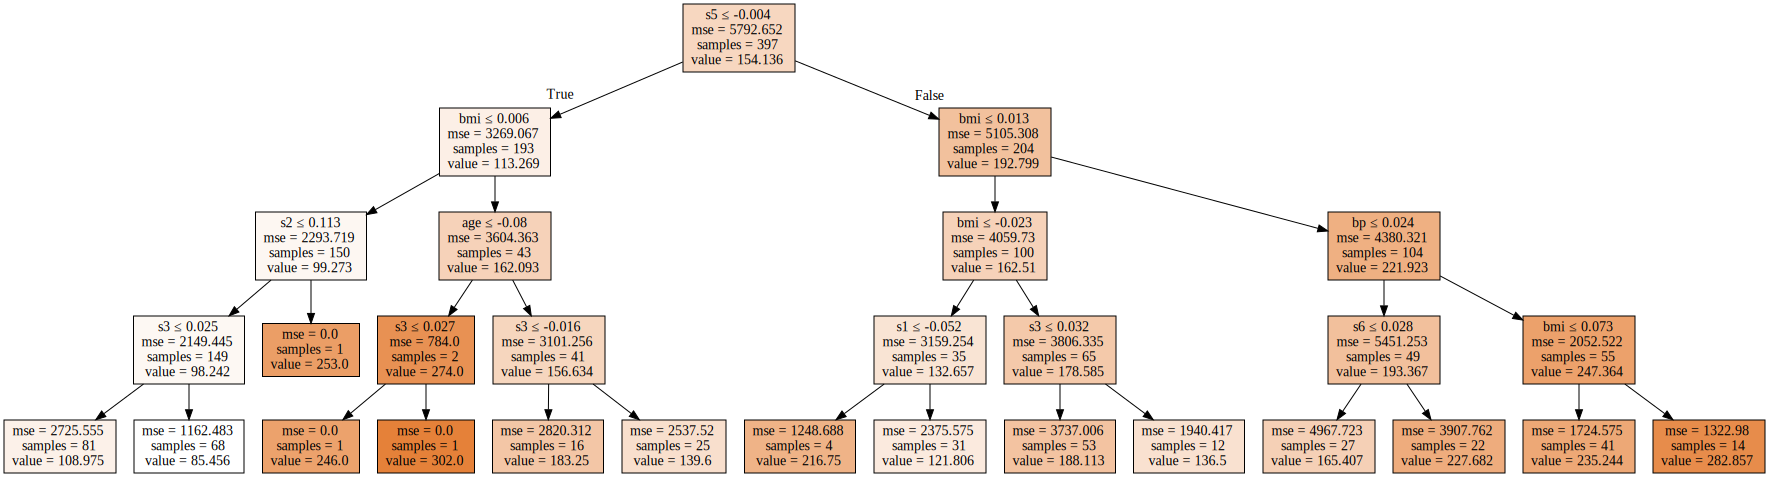

In [323]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg,out_file=None,special_characters=True,filled=True, feature_names=diabetes["feature_names"])
graph = graphviz.Source(g)
graph

In [324]:
test_result = reg.predict(x_test)
print("預測結果:",list(test_result))
print("實際結果:",list(y_ans))


預測結果: [85.45588235294117, 85.45588235294117, 121.80645161290323, 136.5, 85.45588235294117, 139.6, 121.80645161290323, 108.9753086419753, 85.45588235294117, 282.85714285714283, 121.80645161290323, 108.9753086419753, 85.45588235294117, 282.85714285714283, 121.80645161290323, 85.45588235294117, 108.9753086419753, 227.6818181818182, 235.2439024390244, 188.11320754716982, 108.9753086419753, 85.45588235294117, 227.6818181818182, 108.9753086419753, 85.45588235294117, 85.45588235294117, 85.45588235294117, 183.25, 165.40740740740742, 216.75, 85.45588235294117, 108.9753086419753, 188.11320754716982, 188.11320754716982, 85.45588235294117, 282.85714285714283, 183.25, 108.9753086419753, 121.80645161290323, 108.9753086419753, 227.6818181818182, 188.11320754716982, 136.5, 139.6, 108.9753086419753]
實際結果: [60.0, 85.0, 124.0, 283.0, 71.0, 85.0, 163.0, 68.0, 97.0, 258.0, 206.0, 40.0, 72.0, 281.0, 189.0, 88.0, 104.0, 275.0, 270.0, 164.0, 74.0, 60.0, 268.0, 63.0, 49.0, 64.0, 59.0, 91.0, 142.0, 140.0, 89.0,

In [325]:
from sklearn.metrics import r2_score

pr = r2_score(y_ans, test_result)
pr

0.5243288463252986